

# 📚 **Project Documentation: Unified AI/ML Resource Recommendation System**

## 🔹 Executive Summary

This project addresses the challenge of navigating the rapidly expanding body of literature in **Artificial Intelligence (AI), Machine Learning (ML), and related fields** (Deep Learning, NLP, Data Science). The primary objective is to construct a **high-quality, comprehensive dataset** integrating both seminal **research papers (Semantic Scholar)** and foundational **academic books (Google Books)**. This curated dataset will serve as the core foundation for developing an advanced, content-based recommendation system designed to provide learners, researchers, and practitioners with immediate access to the most relevant and impactful resources.

---

## 🔹 Motivation & Problem Statement

The exponential growth of publications in the AI/ML ecosystem creates significant information overload, making it inefficient for professionals to identify literature that is both highly relevant to their interests and validated by the academic community. Current search tools often lack the ability to effectively cross-reference across different resource types (books vs. papers) or integrate objective quality signals like citation counts and reader ratings. This project aims to solve this by:

* **Minimizing Discovery Friction:** Streamlining the process of locating authoritative resources.
* **Enhancing Resource Quality:** Providing recommendations backed by objective metrics (citations, ratings, recency).
* **Bridging Academic and Foundational Knowledge:** Creating a unified knowledge base that treats books and papers as interconnected assets.

---

## 🔹 Project Goals & Deliverables

The successful completion of this project is defined by the fulfillment of the following goals and the creation of the specified deliverables:

| Goal | Description | Status |
| :--- | :--- | :--- |
| **Data Acquisition** | Systematically fetch and ingest academic metadata for books and research papers from designated APIs. | Complete |
| **Data Unification & Schema Design** | Design a consistent, merged schema to accommodate diverse fields from both Google Books and Semantic Scholar. | Complete |
| **Quality Assurance (QA)** | Implement rigorous filtering and de-duplication processes to maintain dataset integrity and resource uniqueness. | Complete |
| **Persistence & Accessibility** | Store the data in both **raw JSON** (for archival and full detail) and **refined CSV** (for immediate analysis and modeling). | Complete |

**Key Data Fields Captured:** Title, Abstract/Description, Authors, Publication Year, Venue/Publisher, URL, Citations (for papers), and Ratings (for books).

---

## 🔹 Core Technology and Data Sources

| Component | Purpose | Details |
| :--- | :--- | :--- |
| **Google Books API** | Source for foundational and academic books. | Focus on title, publisher, and rating/review counts. |
| **Semantic Scholar API** | Source for high-impact research papers. | Critical for capturing citation counts, authors, and venue information. |
| **Python Ecosystem** | Data processing, manipulation, and storage. | Utilizes **Pandas** for schema refinement and data consistency. |
| **TF-IDF & Cosine Similarity** | Content analysis backbone for the future recommender engine. | Text representation and item-to-item relationship mapping. |

---

## 🔹 Future Scope & Advanced Development

The current dataset forms the Minimum Viable Product (MVP). Future development will focus on utilizing this dataset to achieve advanced recommendation capabilities:

1.  **Unified Recommendation Modeling:** Develop a single recommendation model (e.g., Content-Based Filtering using the established TF-IDF vectors) that seamlessly recommends both books and papers based on an input resource.
2.  **Impact-Weighted Ranking:** Implement a weighted ranking algorithm that incorporates both **textual relevance (cosine similarity)** and **academic impact ($\text{citations} \times \text{recency}$)** to prioritize suggestions.
3.  **Personalization Layer:** Extend the content-based approach to a hybrid model by simulating user profiles based on a history of read/liked resources for personalized recommendations.
4.  **Evaluation and Benchmarking:** Rigorous offline evaluation using metrics such as **Intra-List Similarity (Diversity)** and **Catalog Coverage** to ensure the recommendations are robust, diverse, and not biased towards popular items.

# Importing the Required Tools

In [73]:
# Fetching data from api
import requests
import json
import time
import json


#utility
import warnings
warnings.filterwarnings("ignore")

# Data Exploration 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


#Feature Engineering
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


# Loading the Data

## Loading the books info from Google Books Api

In [74]:
# API_KEY="My_API_KEY"
# queries = [
#     'intitle:"machine learning"',
#     'intitle:"deep learning"',
#     'intitle:"artificial intelligence"',
#     'intitle:"natural language processing"',
#     'intitle:"data science"',
#     'intitle:"computer vision"',
#     'intitle:"reinforcement learning"',
#     'intitle:"ML algorithms"',
#     'intitle:"AI research"',
#     'intitle:"neural networks"'
# ]

# all_books = []

# for q in queries:
#     for start in range(0,400,40):
#         url= url = f"https://www.googleapis.com/books/v1/volumes?q={q}&maxResults=40&startIndex={start}&key={API_KEY}"
#         response=requests.get(url)
#         data=response.json()
#         items=data.get("items",[])
#         all_books.extend(items)
#         time.sleep(0.8)
        

# with open("data/Ml_books.json","w",encoding="utf=8") as f:
#     json.dump(all_books,f,ensure_ascii=False,indent=4)
    
# print(f"Fetched {len(all_books)} books and saved to data/Ml_books.json")

In [75]:
# # Loading the saved Json file
# with open("data/Ml_books.json","r") as f:
#     all_books=json.load(f)

# # Relevant key words
# ml_keywords = [
#     "machine learning",
#     "deep learning",
#     "artificial intelligence",
#     "natural language processing",
#     "nlp",
#     "data science",
#     "computer vision",
#     "reinforcement learning",
#     "ml algorithms",
#     "ai research",
#     "neural networks"
# ]

# # Refining the data with relevent key words
# filtered_books = []
# for item in all_books:
#     title = item["volumeInfo"].get("title", "").lower()
#     desc = item["volumeInfo"].get("description", "").lower()
#     if any(k in title or k in desc for k in ml_keywords):
#         filtered_books.append(item)


In [76]:
# # Saving the CSV Dataset with relevent features
# books_list = []
# for item in filtered_books:
#     info = item["volumeInfo"]
#     books_list.append({
#         "title": info.get("title"),
      
#         "authors": ", ".join(info.get("authors", [])),
#         "description": info.get("description", ""),
#         "categories": ", ".join(info.get("categories", [])),
#         "publisher":info.get('publisher',[]),
#         "publishedDate": info.get("publishedDate", ""),
#         "avgrating":info.get("averageRating", 0),
#         "pagecount":info.get("pageCount",0),
 
#     })

# df = pd.DataFrame(books_list)
# df.to_csv("data/ml_books.csv", index=False)
# print("Saved filtered books to data/ml_books.csv")


## Loading the Research papers from Semanticscholar.org

In [77]:
# # Function to fetch the papers
# def fetch_papers(query, limit=100, max_results=300):
#     """
#     Fetch research papers from Semantic Scholar API.
#     query: search keyword (e.g., "machine learning")
#     limit: results per API call (max 100)
#     max_results: total number of results to fetch
#     """
#     papers = []
#     base_url = "https://api.semanticscholar.org/graph/v1/paper/search"
#     fields = "title,abstract,authors,url,year,citationCount,venue"

#     for offset in range(0, max_results, limit):
#         url = f"{base_url}?query={query}&limit={limit}&offset={offset}&fields={fields}"
#         response = requests.get(url)

#         if response.status_code != 200:
#             print("Error fetching", query, ":", response.status_code)
#             break

#         data = response.json()
#         items = data.get("data", [])
#         if not items:
#             break

#         # Attach query label for reference
#         for item in items:
#             item["searchQuery"] = query
#         papers.extend(items)

#         time.sleep(1)  # avoid hitting API too fast

#     return papers


In [78]:
# #  Function to save results
# def save_papers(papers, json_file="papers.json", csv_file="papers.csv"):
#     """
#     Save papers to JSON (raw) and CSV (refined).
#     """
#     # Save raw JSON
#     with open(json_file, "w", encoding="utf-8") as f:
#         json.dump(papers, f, indent=4, ensure_ascii=False)

#     # Refine for CSV
#     refined = []
#     for p in papers:
#         refined.append({
#             "SearchQuery": p.get("searchQuery", ""),
#             "Title": p.get("title", ""),
#             "Abstract": p.get("abstract", ""),
#             "Authors": ", ".join([a.get("name", "") for a in p.get("authors", [])]),
#             "Year": p.get("year", ""),
#             "Citations": p.get("citationCount", 0),
#             "Venue": p.get("venue", ""),
#             "URL": p.get("url", "")
#         })

#     df = pd.DataFrame(refined)
#     df.to_csv(csv_file, index=False, encoding="utf-8")
#     print(f"Saved {len(refined)} papers → {json_file}, {csv_file}")


In [79]:
# # Loading the papers with Relevant key words
# queries = [
#     "machine learning",
#     "deep learning",
#     "artificial intelligence",
#     "natural language processing",
#     "nlp",
#     "computer vision",
#     "reinforcement learning",
#     "data science"
# ]

# all_papers = []
# for q in queries:
#     print(f"Fetching papers for: {q}")
#     papers = fetch_papers(q, limit=100, max_results=300) 
#     all_papers.extend(papers)

# save_papers(all_papers, json_file="data/all_papers.json", csv_file="data/all_papers.csv")


# 🔍 Data Inspection & Preview

---

## Purpose
Before using the dataset for analysis or building a recommendation system, it is important to **explore and inspect the data** to ensure:  
- Data was fetched correctly from the APIs  
- All key fields (Title, Abstract, Authors, Year, Citations, URL) are present  
- There are no duplicates or missing values  
- The dataset covers all intended categories  

In [80]:
# BOOKS DataFrame
df_books=pd.read_csv("data/ml_books.csv")
df_books.head()

,title,authors,description,categories,publisher,publishedDate,avgrating,pagecount
0,Python Machine Learning,"Sebastian Raschka, Vahid Mirjalili",Applied machine learning with a solid foundati...,Computers,Packt Publishing Ltd,2019-12-12,0.0,771
1,Introduction to Machine Learning,Ethem Alpaydin,An introductory text in machine learning that ...,Computers,MIT Press,2004,4.0,468
2,Understanding Machine Learning,"Shai Shalev-Shwartz, Shai Ben-David",Introduces machine learning and its algorithmi...,Computers,Cambridge University Press,2014-05-19,5.0,415
3,"Introduction to Machine Learning, fourth edition",Ethem Alpaydin,A substantially revised fourth edition of a co...,Computers,MIT Press,2020-03-24,0.0,709
4,"Hands-On Machine Learning with Scikit-Learn, K...",Aurélien Géron,"Through a series of recent breakthroughs, deep...",Computers,O'Reilly Media,2019-09-05,0.0,851


In [81]:
# PAPER DataFrame
df_paper=pd.read_csv("data/all_papers.csv")
df_paper.head()

,SearchQuery,Title,Abstract,Authors,Year,Citations,Venue,URL
0,artificial intelligence,Peeking Inside the Black-Box: A Survey on Expl...,At the dawn of the fourth industrial revolutio...,"Amina Adadi, M. Berrada",2018.0,4078,IEEE Access,https://www.semanticscholar.org/paper/21dff47a...
1,artificial intelligence,High-performance medicine: the convergence of ...,NaN,E. Topol,2019.0,4910,Nature Network Boston,https://www.semanticscholar.org/paper/f134abea...
2,artificial intelligence,Sparks of Artificial General Intelligence: Ear...,Artificial intelligence (AI) researchers have ...,"Sébastien Bubeck, Varun Chandrasekaran, Ronen ...",2023.0,3388,arXiv.org,https://www.semanticscholar.org/paper/8dbd5746...
3,artificial intelligence,Explainable Artificial Intelligence (XAI): Con...,NaN,"Alejandro Barredo Arrieta, Natalia Díaz Rodríg...",2019.0,6788,Information Fusion,https://www.semanticscholar.org/paper/530a059c...
4,artificial intelligence,Explanation in Artificial Intelligence: Insigh...,NaN,Tim Miller,2017.0,4511,Artificial Intelligence,https://www.semanticscholar.org/paper/e89dfa30...


# Exploratory Data Analysis

### DataFrame Informations

In [82]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          1296 non-null   object 
 1   authors        1273 non-null   object 
 2   description    1180 non-null   object 
 3   categories     1187 non-null   object 
 4   publisher      1296 non-null   object 
 5   publishedDate  1283 non-null   object 
 6   avgrating      1296 non-null   float64
 7   pagecount      1296 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 81.1+ KB


In [83]:
df_paper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SearchQuery  600 non-null    object 
 1   Title        600 non-null    object 
 2   Abstract     381 non-null    object 
 3   Authors      595 non-null    object 
 4   Year         596 non-null    float64
 5   Citations    600 non-null    int64  
 6   Venue        549 non-null    object 
 7   URL          600 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 37.6+ KB


In [84]:

# Combine numeric descriptions side by side
desc_books = df_books.describe()
desc_papers = df_paper.describe()

combined_desc = pd.concat([desc_books, desc_papers], axis=1, keys=["Books", "Papers"])
display(combined_desc)

Books                    Papers              
         avgrating    pagecount         Year     Citations
count  1296.000000  1296.000000   596.000000    600.000000
mean      0.343750   366.627315  2018.906040   1052.273333
std       1.209872   288.636565     5.232211   4890.785858
min       0.000000     0.000000  1980.000000      0.000000
25%       0.000000   203.000000  2018.000000    116.750000
50%       0.000000   318.000000  2020.000000    267.500000
75%       0.000000   479.250000  2022.000000    590.500000
max       5.000000  3296.000000  2025.000000  99369.000000

### Checking the Null values

In [85]:
df_books.isna().sum()

title              0
authors           23
description      116
categories       109
publisher          0
publishedDate     13
avgrating          0
pagecount          0
dtype: int64

In [86]:
df_paper.isna().sum()

SearchQuery      0
Title            0
Abstract       219
Authors          5
Year             4
Citations        0
Venue           51
URL              0
dtype: int64

In [87]:
duplicates_books=df_books.duplicated()
duplicates_papers=df_paper.duplicated()
print(f"There are {duplicates_books.sum()} duplicates in books and {duplicates_papers.sum()} duplicates in papers")

There are 39 duplicates in books and 1 duplicates in papers


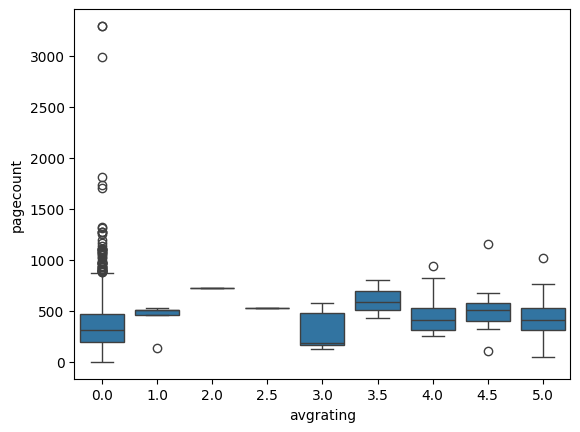

In [88]:
# Page count vs Rating
sns.boxplot(df_books,x="avgrating",y="pagecount")
plt.show()

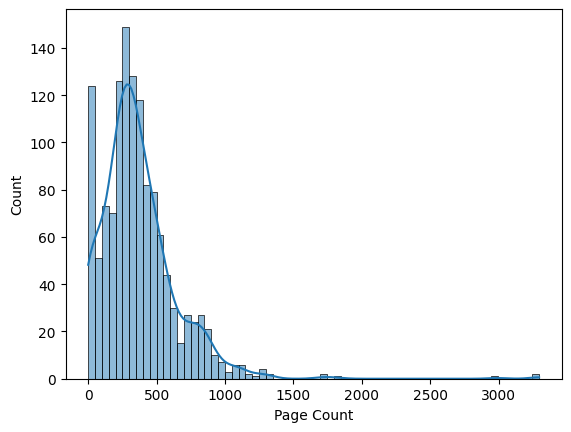

In [89]:
# Number of pages distribution
sns.histplot(df_books,x="pagecount",kde=True)
plt.xlabel("Page Count")
plt.show()

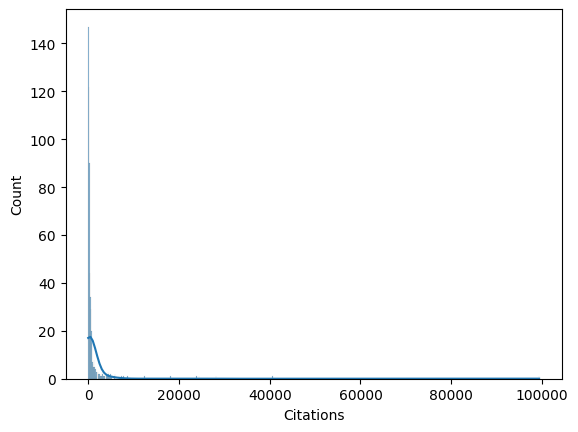

In [90]:
sns.histplot(df_paper,x="Citations",kde=True)
plt.show()

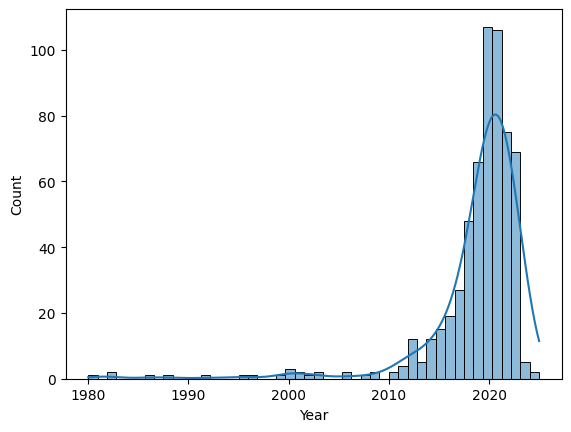

In [91]:
# Publish year distribution
sns.histplot(df_paper,x="Year",kde=True)
plt.show()

### Research Paper Publication Year Distribution

* The histogram below visualizes the distribution of publication years for research papers in the dataset.  
* This helps identify trends, recency, and the temporal coverage of the collected papers.

**X-axis:** Publication Year  
**Y-axis:** Number of Papers  

Most papers are recent, with a concentration in the last few years, reflecting the rapid growth in AI/ML research.


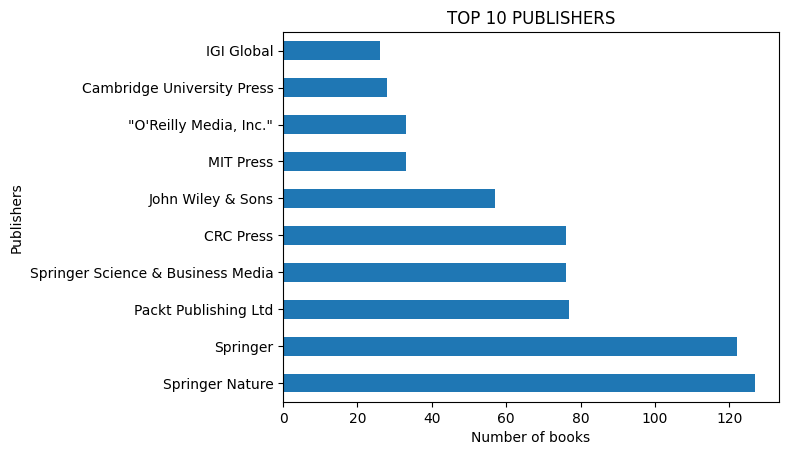

In [92]:
#Top 5 publishers
df_books["publisher"].value_counts()[1:11].plot(kind="barh")
plt.title("TOP 10 PUBLISHERS")
plt.xlabel("Number of books")
plt.ylabel("Publishers")
plt.show()

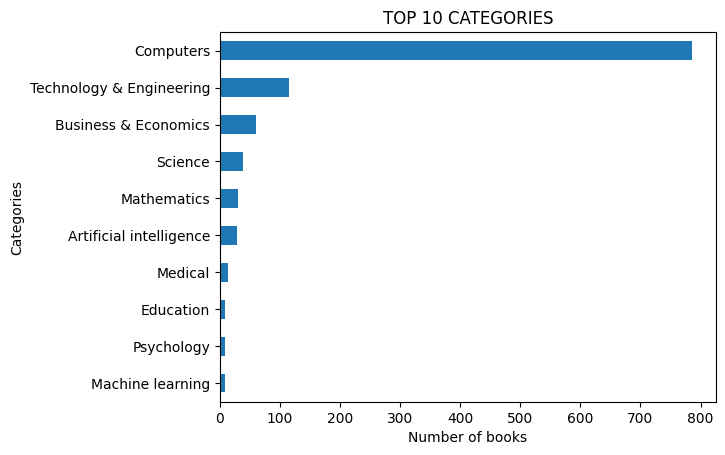

In [93]:
df_books["categories"].value_counts()[:10].iloc[::-1].plot(kind="barh")
plt.title("TOP 10 CATEGORIES")
plt.xlabel("Number of books")
plt.ylabel("Categories")
plt.show()


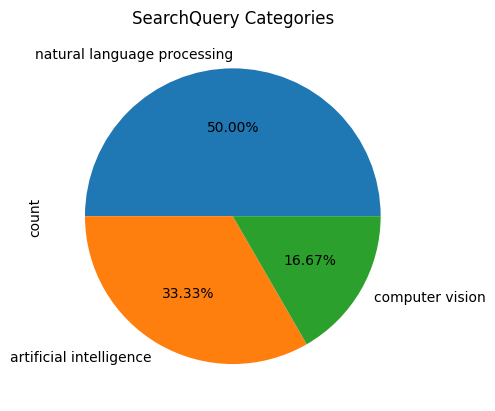

In [94]:
df_paper["SearchQuery"].value_counts().plot(kind="pie",autopct="%.2f%%")
plt.title("SearchQuery Categories")
plt.show()

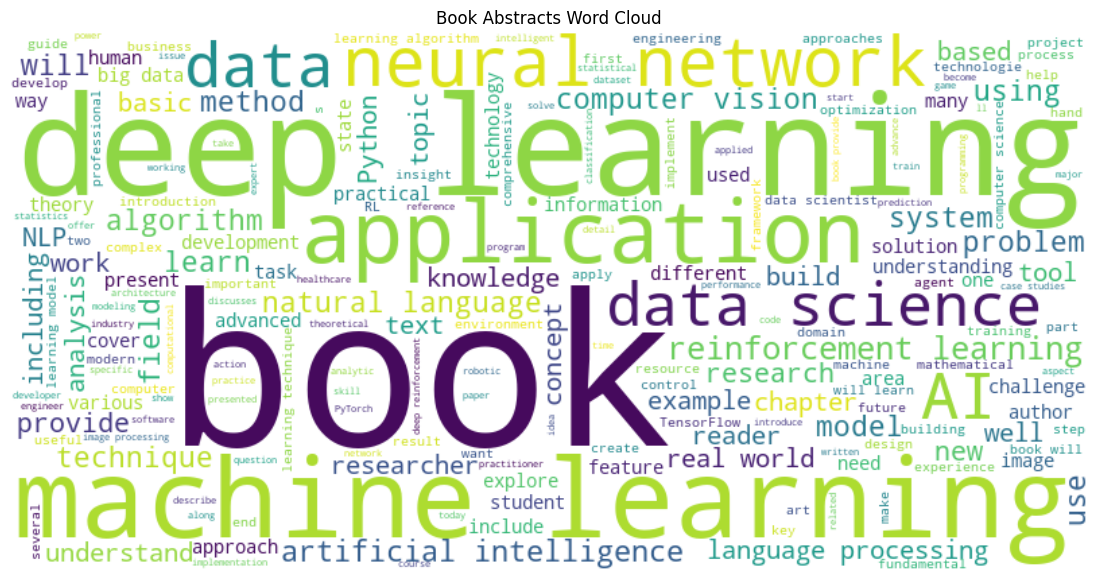

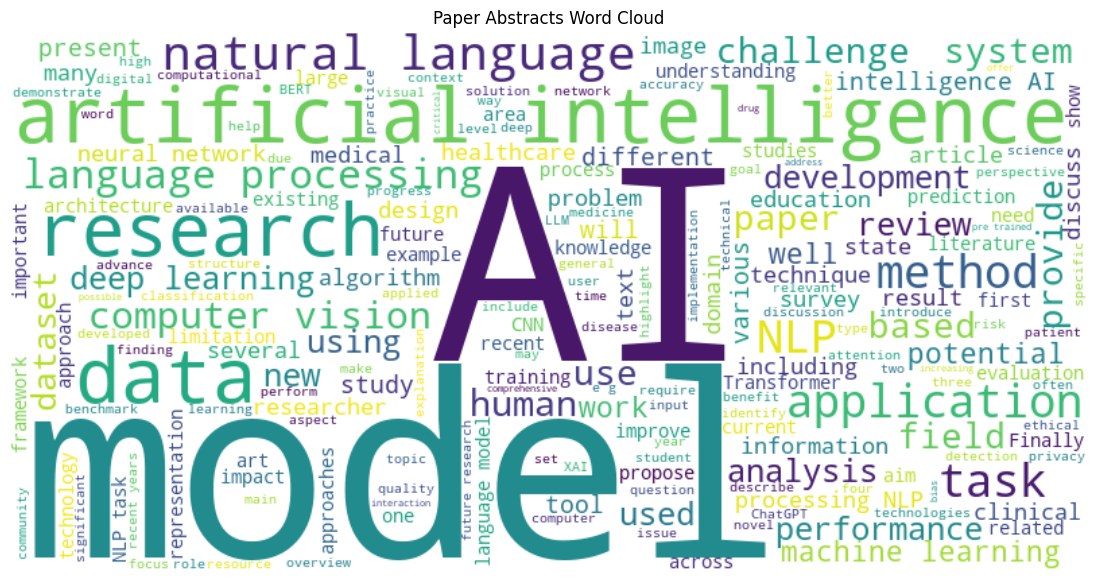

In [95]:
# Combine all text from a column
text_books = " ".join(df_books['description'].dropna().tolist())
text_papers = " ".join(df_paper['Abstract'].dropna().tolist())

# Generate word cloud
wordcloud_books = WordCloud(width=800, height=400, background_color='white', stopwords=None).generate(text_books)
wordcloud_papers = WordCloud(width=800, height=400, background_color='white', stopwords=None).generate(text_papers)

# Display
plt.figure(figsize=(15,7))
plt.imshow(wordcloud_books, interpolation='bilinear')
plt.axis('off')
plt.title("Book Abstracts Word Cloud")
plt.show()

plt.figure(figsize=(15,7))
plt.imshow(wordcloud_papers, interpolation='bilinear')
plt.axis('off')
plt.title("Paper Abstracts Word Cloud")
plt.show()

## Feature Engineering

In [96]:
# Dropping the duplicates
df_books=df_books.drop_duplicates(subset=["title"],keep="first")
df_paper=df_paper.drop_duplicates(subset="Title",keep="first")

In [97]:
# fixing the date column in books dataframe
df_books['Date_Extracted'] = (
    df_books['publishedDate']
    .str.extract(r'(\d{4}-\d{2}-\d{2}|\d{4})', expand=False)
)
df_books['publishedDate'] = pd.to_datetime(df_books['Date_Extracted'], errors='coerce')
df_books.drop("Date_Extracted",axis=1,inplace=True)

In [98]:
# Dropping the books with pagecount zero
df_books=df_books[df_books["pagecount"]>0]

In [99]:
# Books
df_books["year"] = pd.to_datetime(
    df_books["publishedDate"], errors="coerce"
).dt.year

# Papers 
df_paper["Year"] = pd.to_numeric(df_paper["Year"], errors="coerce")

In [100]:
#Scaling the year column in both the dataset
scaler = MinMaxScaler()

# Books
valid_years = df_books["year"].dropna().values.reshape(-1, 1)
df_books.loc[df_books["year"].notna(), "recency_score"] = scaler.fit_transform(valid_years)

# Papers
valid_years = df_paper["Year"].dropna().values.reshape(-1, 1)
df_paper.loc[df_paper["Year"].notna(), "recency_score"] = scaler.fit_transform(valid_years)

In [101]:
# Scaling the rating/citations columns in both dataset

df_books["rating_score"] = scaler.fit_transform(df_books["avgrating"].values.reshape(-1, 1))
df_paper["citations_score"] = scaler.fit_transform(df_paper["Citations"].values.reshape(-1, 1))

In [102]:
#Page score for books dataframe
df_books["page_score"]=scaler.fit_transform(df_books["pagecount"].values.reshape(-1, 1))

In [103]:
#filling the null values 
df_books[["recency_score", "rating_score", "page_score"]].fillna(0, inplace=True)

### Processing the text columns 

In [104]:
#Columns to process for similarity score
books_columns=["title","description","categories","authors"]
paper_columns=["SearchQuery","Title","Abstract","Authors"]

In [105]:
df_books_sim=df_books[books_columns]
df_paper_sim=df_paper[paper_columns]

In [106]:
# filling the nan values with empty strings
df_books_sim.fillna("",inplace=True)
df_paper_sim.fillna("",inplace=True)

In [107]:
# Combining the Text columns
df_books_sim['combined_text'] = (
    df_books_sim['title'] + " " + 
    df_books_sim['description'] + " " +
    df_books_sim['categories']+ " " +
    df_books_sim['authors']
)
df_paper_sim['combined_text'] = (
    df_paper_sim["SearchQuery"] + " " + 
    df_paper_sim["Title"] + " " +
    df_paper_sim['Abstract']+ " " +
    df_paper_sim['Authors']
)


In [72]:
def clean_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  
    return text

df_books_sim["combined_text"] = df_books_sim["combined_text"].apply(clean_text)
df_paper_sim['combined_text']=df_paper_sim['combined_text'].apply(clean_text)

## Recomendation System With TF-IDF and Similarity

In [88]:
def build_tfidf_matrix(series_text, max_features=20000):
    tfidf = TfidfVectorizer(stop_words='english', max_features=max_features)
    mat = tfidf.fit_transform(series_text)
    return tfidf, mat

tfidf_book,mat_book=build_tfidf_matrix(df_books_sim["combined_text"])
tfidf_paper,mat_paper=build_tfidf_matrix(df_paper_sim["combined_text"])

print("Book TF-IDF")
print(f"TF-IDF Matrix Shape: {mat_book.shape}")
print(f"Total Unique Features (Words/Phrases): {mat_book.shape[1]}")
print("--"*80)
print("Paper TF-IDF")
print(f"TF-IDF Matrix Shape: {mat_paper.shape}")
print(f"Total Unique Features (Words/Phrases): {mat_paper.shape[1]}")

Book TF-IDF
TF-IDF Matrix Shape: (979, 14707)
Total Unique Features (Words/Phrases): 14707
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Paper TF-IDF
TF-IDF Matrix Shape: (591, 10480)
Total Unique Features (Words/Phrases): 10480


In [89]:
def content_similarity_tfidf(query, tfidf, mat):
    qv = tfidf.transform([query])
    sims = cosine_similarity(qv, mat).flatten()   
    return sims

query="Deep learning"
book_sims=content_similarity_tfidf(query,tfidf_book,mat_book)
paper_sims=content_similarity_tfidf(query,tfidf_paper,mat_paper)


In [90]:
# Final Book score
df_books["sim_score"]=book_sims
df_books["final_score"] = (
    0.55 * df_books["sim_score"] +
    0.25 * df_books["rating_score"] +
    0.15 * df_books["recency_score"] +
    0.05 * df_books["page_score"]
)

top_books = df_books.sort_values("final_score", ascending=False).head(10)


In [91]:
# Final Paper score
df_paper["sim_score"]=paper_sims
df_paper["final_score"] = (
    0.60 * df_paper["sim_score"] +
    0.30 * df_paper["citations_score"] +
    0.10 * df_paper["recency_score"]
)

top_paper = df_paper.sort_values("final_score", ascending=False).head(10)


In [92]:
top_books

,title,authors,description,categories,publisher,publishedDate,avgrating,pagecount,year,recency_score,rating_score,page_score,sim_score,final_score
143,Deep Learning Illustrated,"Jon Krohn, Grant Beyleveld, Aglaé Bassens","""The authors’ clear visual style provides a co...",Computers,Addison-Wesley Professional,2019-08-05,5.0,725,2019.0,0.860465,1.0,0.218066,0.415851,0.618691
238,Deep Learning with Applications Using Python,Navin Kumar Manaswi,"Explore deep learning applications, such as co...",Computers,Apress,2018-04-04,5.0,228,2018.0,0.837209,1.0,0.066910,0.402159,0.600114
123,Deep Learning for Computer Vision,Jason Brownlee,Step-by-step tutorials on deep learning neural...,Computers,Machine Learning Mastery,2019-04-04,5.0,564,2019.0,0.860465,1.0,0.169100,0.349144,0.579554
168,Deep Learning for Natural Language Processing,Jason Brownlee,Deep learning methods are achieving state-of-t...,Computers,Machine Learning Mastery,2017-11-21,5.0,413,2017.0,0.813953,1.0,0.123175,0.311250,0.549439
237,TensorFlow 1.x Deep Learning Cookbook,"Antonio Gulli, Amita Kapoor",Take the next step in implementing various com...,Computers,Packt Publishing Ltd,2017-12-12,5.0,526,2017.0,0.813953,1.0,0.157543,0.256021,0.520782
126,Deep Learning for Time Series Forecasting,Jason Brownlee,Deep learning methods offer a lot of promise f...,Computers,Machine Learning Mastery,2018-08-30,4.5,572,2018.0,0.837209,0.9,0.171533,0.250619,0.496998
272,"Practical Deep Learning for Cloud, Mobile, and...","Anirudh Koul, Siddha Ganju, Meher Kasam",Whether you’re a software engineer aspiring to...,Computers,O'Reilly Media,2019-10-14,5.0,586,2019.0,0.860465,1.0,0.175791,0.184678,0.489432
983,Deep Reinforcement Learning with Python,Sudharsan Ravichandiran,An example-rich guide for beginners to start t...,Mathematics,Packt Publishing Ltd,2020-09-30,5.0,761,2020.0,0.883721,1.0,0.229015,0.160195,0.482116
470,Python Natural Language Processing,Jalaj Thanaki,Leverage the power of machine learning and dee...,Computers,Packt Publishing Ltd,2017-07-31,5.0,476,2017.0,0.813953,1.0,0.142336,0.183824,0.480313
65,Approaching (Almost) Any Machine Learning Problem,Abhishek Thakur,This is not a traditional book. The book has a...,Computers,Abhishek Thakur,2020-07-04,5.0,300,2020.0,0.883721,1.0,0.088808,0.153367,0.471350


In [93]:
top_paper

,SearchQuery,Title,Abstract,Authors,Year,Citations,Venue,URL,recency_score,citations_score,sim_score,final_score
471,natural language processing,BERT: Pre-training of Deep Bidirectional Trans...,We introduce a new language representation mod...,"Jacob Devlin, Ming-Wei Chang, Kenton Lee, Kris...",2019.0,99369,North American Chapter of the Association for ...,https://www.semanticscholar.org/paper/df2b0e26...,0.866667,1.000000,0.055034,0.419687
545,computer vision,Deep reinforcement learning in computer vision...,Deep reinforcement learning augments the reinf...,"Ngan T. H. Le, V. Rathour, Kashu Yamazaki, Kho...",2021.0,190,Artificial Intelligence Review,https://www.semanticscholar.org/paper/8fe44af1...,0.911111,0.001912,0.418338,0.342687
524,computer vision,A Review on Machine Learning Styles in Compute...,Computer applications have considerably shifte...,"Supriya V. Mahadevkar, Bharti Khemani, S. Pati...",2022.0,142,IEEE Access,https://www.semanticscholar.org/paper/59694d8b...,0.933333,0.001429,0.408889,0.339095
530,computer vision,A survey on deep multimodal learning for compu...,The research progress in multimodal learning h...,"Khaled Bayoudh, Raja Knani, F. Hamdaoui, A. Mt...",2021.0,347,The Visual Computer,https://www.semanticscholar.org/paper/2a9b33f6...,0.911111,0.003492,0.359662,0.307956
210,natural language processing,Recent Trends in Deep Learning Based Natural L...,Deep learning methods employ multiple processi...,"Tom Young, Devamanyu Hazarika, Soujanya Poria,...",2017.0,2887,IEEE Computational Intelligence Magazine,https://www.semanticscholar.org/paper/ce2d5b58...,0.822222,0.029053,0.360055,0.306971
506,computer vision,Deep Learning for Computer Vision: A Brief Review,Over the last years deep learning methods have...,"A. Voulodimos, N. Doulamis, A. Doulamis, Eftyc...",2018.0,2938,Computational Intelligence and Neuroscience,https://www.semanticscholar.org/paper/ca011427...,0.844444,0.029567,0.350464,0.303593
540,computer vision,Deep learning and computer vision will transfo...,"Most animal species on Earth are insects, and ...","T. Høye, J. Ärje, K. Bjerge, O. L. P. Hansen, ...",2020.0,311,Proceedings of the National Academy of Science...,https://www.semanticscholar.org/paper/4fd9bc4c...,0.888889,0.003130,0.305966,0.273407
550,computer vision,Tensor Methods in Computer Vision and Deep Lea...,"Tensors, or multidimensional arrays, are data ...","Yannis Panagakis, Jean Kossaifi, Grigorios G. ...",2021.0,134,Proceedings of the IEEE,https://www.semanticscholar.org/paper/4ec9edd7...,0.911111,0.001349,0.298274,0.270480
561,computer vision,Deep Learning vs. Traditional Computer Vision,Deep Learning has pushed the limits of what wa...,"Niall O' Mahony, S. Campbell, A. Carvalho, S. ...",2019.0,928,Computer Vision Conference,https://www.semanticscholar.org/paper/92e4ef55...,0.866667,0.009339,0.297286,0.267840
286,natural language processing,Natural Language Processing Advancements By De...,Natural Language Processing (NLP) helps empowe...,"A. Torfi, Rouzbeh A. Shirvani, Yaser Keneshloo...",2020.0,231,arXiv.org,https://www.semanticscholar.org/paper/77b91d76...,0.888889,0.002325,0.286103,0.261248


## Recommendation using Sentence Transformer Embeddings

In [ ]:
from sentence_transformers import SentenceTransformer, util
# model = SentenceTransformer('all-MiniLM-L6-v2')


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [131]:
# model.save("C:\Vscode\git\mlops\Book-Recomendation\models")
model=SentenceTransformer("C:\Vscode\git\mlops\Book-Recomendation\models")

In [132]:
embeddings = model.encode(df_books_sim["combined_text"].tolist(),normalize_embeddings=True)

In [121]:
embeddings.shape

(979, 384)

In [122]:
query=["Deep learning"]
book_sims=util.cos_sim(model.encode(query,normalize_embeddings=True),embeddings)

In [127]:
book_sims=book_sims.reshape(-1)

In [129]:
df_books["sim_score"]=book_sims
df_books["final_score"] = (
    0.55 * df_books["sim_score"] +
    0.25 * df_books["rating_score"] +
    0.15 * df_books["recency_score"] +
    0.05 * df_books["page_score"]
)

top_books = df_books.sort_values("final_score", ascending=False).head(10)

In [130]:
top_books

,title,authors,description,categories,publisher,publishedDate,avgrating,pagecount,year,recency_score,rating_score,page_score,sim_score,final_score
143,Deep Learning Illustrated,"Jon Krohn, Grant Beyleveld, Aglaé Bassens","""The authors’ clear visual style provides a co...",Computers,Addison-Wesley Professional,2019-08-05,5.0,725,2019.0,0.860465,1.0,0.218066,0.565705,0.701111
168,Deep Learning for Natural Language Processing,Jason Brownlee,Deep learning methods are achieving state-of-t...,Computers,Machine Learning Mastery,2017-11-21,5.0,413,2017.0,0.813953,1.0,0.123175,0.582726,0.698751
126,Deep Learning for Time Series Forecasting,Jason Brownlee,Deep learning methods offer a lot of promise f...,Computers,Machine Learning Mastery,2018-08-30,4.5,572,2018.0,0.837209,0.9,0.171533,0.554673,0.664228
123,Deep Learning for Computer Vision,Jason Brownlee,Step-by-step tutorials on deep learning neural...,Computers,Machine Learning Mastery,2019-04-04,5.0,564,2019.0,0.860465,1.0,0.169100,0.499609,0.662310
272,"Practical Deep Learning for Cloud, Mobile, and...","Anirudh Koul, Siddha Ganju, Meher Kasam",Whether you’re a software engineer aspiring to...,Computers,O'Reilly Media,2019-10-14,5.0,586,2019.0,0.860465,1.0,0.175791,0.475758,0.649526
238,Deep Learning with Applications Using Python,Navin Kumar Manaswi,"Explore deep learning applications, such as co...",Computers,Apress,2018-04-04,5.0,228,2018.0,0.837209,1.0,0.066910,0.476920,0.641233
237,TensorFlow 1.x Deep Learning Cookbook,"Antonio Gulli, Amita Kapoor",Take the next step in implementing various com...,Computers,Packt Publishing Ltd,2017-12-12,5.0,526,2017.0,0.813953,1.0,0.157543,0.464118,0.635235
159,Hands-On Computer Vision with TensorFlow 2,"Benjamin Planche, Eliot Andres",A practical guide to building high performance...,Computers,Packt Publishing Ltd,2019-05-30,5.0,363,2019.0,0.860465,1.0,0.107968,0.430715,0.621361
983,Deep Reinforcement Learning with Python,Sudharsan Ravichandiran,An example-rich guide for beginners to start t...,Mathematics,Packt Publishing Ltd,2020-09-30,5.0,761,2020.0,0.883721,1.0,0.229015,0.402494,0.615380
82,Mastering Machine Learning Algorithms,Giuseppe Bonaccorso,Explore and master the most important algorith...,Computers,Packt Publishing Ltd,2018-05-25,5.0,567,2018.0,0.837209,1.0,0.170012,0.413254,0.611372


## Evaluation

In [94]:
def precision_at_k(y_true,y_score,k=5):
    """Precision@K: fraction of top-K items that are relevant"""
    idx=np.argsort(y_score)[::-1][:k]
    relevant = len(set(idx) & set(y_true))
    return relevant/5


def recall_at_k(y_true, y_score, k=5):
    """Recall@K: fraction of all relevant items captured in top-K"""
    idx = np.argsort(y_score)[::-1][:k]
    return np.sum(y_true[idx]) / np.sum(y_true) if np.sum(y_true) > 0 else 0.0
    
def ndcg_at_k(y_true, y_score, k=5):
    """NDCG@K: ranking quality"""
    idx = np.argsort(y_score)[::-1][:k]
    gains = 2**y_true[idx] - 1
    discounts = np.log2(np.arange(2, k+2))
    dcg = np.sum(gains / discounts)

    # Ideal DCG (perfect ranking)
    ideal_idx = np.argsort(y_true)[::-1][:k]
    ideal_gains = 2**y_true[ideal_idx] - 1
    idcg = np.sum(ideal_gains / discounts)

    return dcg / idcg if idcg > 0 else 0.0

In [95]:
# Mark relevant books
df_books["relevant"] = (df_books["avgrating"] >= 4).astype(int)

y_true = df_books["relevant"].values
y_score = df_books["final_score"].values

print("Precision@5:", precision_at_k(y_true, y_score, k=5))
print("Recall@5:", recall_at_k(y_true, y_score, k=5))
print("NDCG@5:", ndcg_at_k(y_true, y_score, k=5))


Precision@5: 0.0
Recall@5: 0.0
NDCG@5: 0.0


In [96]:
# Mark relevant papers (e.g., citations >= 50)
df_paper["relevant"] = (df_paper["Citations"] >= 50).astype(int)

y_true = df_paper["relevant"].values
y_score = df_paper["final_score"].values

print("Precision@5:", precision_at_k(y_true, y_score, k=5))
print("Recall@5:", recall_at_k(y_true, y_score, k=5))
print("NDCG@5:", ndcg_at_k(y_true, y_score, k=5))


Precision@5: 0.0
Recall@5: 0.0071301247771836
NDCG@5: 0.6608397947263839


In [97]:
results = []
for query in ["transformers NLP", "deep learning", "reinforcement learning"]:
    # get updated final_score per query
    # (simulate by re-running similarity for this query)
    book_sims=content_similarity_tfidf(query,tfidf_book,mat_book)
    df_books["sim_score"]=book_sims
# paper_sims=content_similarity_tfidf(query,tfidf_paper,mat_paper)
    df_books["final_score"] = (
    0.55 * df_books["sim_score"] +
    0.25 * df_books["rating_score"] +
    0.15 * df_books["recency_score"] +
    0.05 * df_books["page_score"]
)
    
    y_true = df_books["relevant"].values
    y_score = df_books["final_score"].values
    
    results.append({
        "Query": query,
        "Precision@5": precision_at_k(y_true, y_score, k=5),
        "Recall@5": recall_at_k(y_true, y_score, k=5),
        "NDCG@5": ndcg_at_k(y_true, y_score, k=5)
    })


results_df = pd.DataFrame(results)
print(results_df)


                    Query  Precision@5  Recall@5    NDCG@5
0        transformers NLP          0.0  0.000000  0.000000
1           deep learning          0.0  0.000000  0.000000
2  reinforcement learning          0.2  0.015385  0.213986
